<a href="https://colab.research.google.com/github/hspgit/Combinatorial-Testing-Of-Arrays/blob/main/term_statistics_new_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Terms and Documents

This exercise starts off with term statistics computations and graphing. In the final section (for CS6200 students), you collect new documents to experiment with.

Read through this Jupyter notebook and fill in the parts marked with `TODO`.

## Sample Data

Start by looking at some sample data. We donwload the counts of terms in documents for the first one million tokens of a newswire collection.

In [1]:
!wget -O ap201001.json.gz https://github.com/dasmiq/cs6200-documents/blob/main/ap201001.json.gz?raw=true
!gunzip ap201001.json.gz

--2025-01-19 04:23:21--  https://github.com/dasmiq/cs6200-documents/blob/main/ap201001.json.gz?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/dasmiq/cs6200-documents/raw/refs/heads/main/ap201001.json.gz [following]
--2025-01-19 04:23:21--  https://github.com/dasmiq/cs6200-documents/raw/refs/heads/main/ap201001.json.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dasmiq/cs6200-documents/refs/heads/main/ap201001.json.gz [following]
--2025-01-19 04:23:22--  https://raw.githubusercontent.com/dasmiq/cs6200-documents/refs/heads/main/ap201001.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185

We convert this file with one JSON record on each line to a list of dictionaries.

In [2]:
import json
rawfile = open('ap201001.json')
terms = [json.loads(line) for line in rawfile]

Here are the first ten records, showing the count of each term for each document and field. In this dataset, field only takes the values `body` or `title`.

In [3]:
terms[1:10]

[{'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'about', 'count': 1},
 {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'abuse', 'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'academy',
  'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'accused',
  'count': 2},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'actress',
  'count': 1},
 {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'ad', 'count': 1},
 {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'after', 'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'agenda',
  'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'agreed',
  'count': 1}]

Each record has four fields:
* `id`, with the identifier for the document;
* `field`, with the region of the document containing a given term;
* `term`, with the lower-cased term; and
* `count`, with the number of times each term occurred in that field and document.

## Computing Term Statistics


If we look at the most frequent terms for a given document, we mostly see common function words, such as `the`, `and`, and `of`. Start exploring the dataset by computing some of these basic term statistics. You can make your life easier using data frame libraries such as `pandas`, core python libraries such as `collections`, or just simple list comprehensions.

Feel free to define helper functions in your code before computing the statistics we're looking for.

In [4]:
# TODO: Print the 10 terms from document APW_ENG_20100101.0001 with the highest count.
# Initial comment to check git !
# Filter for the specific document
document_terms = [
    term for term in terms if term['id'] == 'APW_ENG_20100101.0001'
]

# Create a dictionary to store term counts
term_counts = {}
for term_data in document_terms:
  term = term_data['term']
  count = term_data['count']
  term_counts[term] = term_counts.get(term, 0) + count

# Sort terms by count in descending order
sorted_terms = sorted(term_counts.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 terms
print("Top 10 terms in document APW_ENG_20100101.0001 by count:")
for term, count in sorted_terms[:10]:
  print(f"{term}: {count}")

Top 10 terms in document APW_ENG_20100101.0001 by count:
a: 16
the: 11
and: 10
brooks: 10
of: 10
to: 10
he: 9
in: 9
gomez: 8
for: 6


In [5]:
# TODO: Print the 10 terms with the highest total count in the corpus.
# Create a dictionary to store term counts
term_counts = {}
for term_data in terms:
  term = term_data['term']
  count = term_data['count']
  term_counts[term] = term_counts.get(term, 0) + count

# Sort terms by count in descending order
sorted_terms = sorted(term_counts.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 terms
print("Top 10 terms in corpus by count:")
for term, count in sorted_terms[:10]:
  print(f"{term}: {count}")

Top 10 terms in corpus by count:
the: 62216
to: 26931
in: 25659
a: 23383
of: 22326
and: 22125
said: 10888
for: 9716
on: 9382
that: 8942


Raw counts may not be the most informative statistic. One common improvement is to use *inverse document frequency*, the inverse of the proportion of documents that contain a given term.

In [6]:
# TODO: Compute the number of distinct documents in the collection.
N = len({term_data['id'] for term_data in terms})
print(f"Number of distinct documents: {N}")

# TODO: Compute the number of distinct documents each term appears in
# and store in a dictionary.
from collections import defaultdict

# Create defaultdict with set as default factory
df = defaultdict(set)

# Collect document IDs
for term_data in terms:
    df[term_data['term']].add(term_data['id'])

# Convert to counts
df = {term: len(docs) for term, docs in df.items()}

# onyl printing first 10 keys
print(dict(list(df.items())[:10]))

Number of distinct documents: 2778
{'a': 2571, 'about': 1077, 'abuse': 26, 'academy': 20, 'accused': 201, 'actress': 23, 'ad': 16, 'after': 1484, 'agenda': 16, 'agreed': 163}


In [7]:
# TODO: Print the relative document frequency of 'the',
# i.e., the number of documents that contain 'the' divided by N.
print(df.get('the') / N)

0.9704823614110871


Empricially, we usually see better retrieval results if we rescale term frequency (within documents) and inverse document frequency (across documents) with the log function. Let the `tfidf` of term _t_ in document _d_ be:
```
tfidf(t, d) = log(count(t, d) + 1) * log(N / df(t))
```

Later in the course, we will show a probabilistic derivation of this quantity based on smoothing language models.

In [8]:
# TODO: Compute the tf-idf value for each term in each document.
# Take the raw term data and add a tfidf field to each record.
tfidf_terms = None
from math import log

tfidf_terms = terms.copy()
total_terms_per_document = defaultdict(int)
for term_data in terms:
    total_terms_per_document[term_data['id']] += term_data['count']


for tfidf_term in tfidf_terms:
    tf = tfidf_term['count'] + 1
    idf = N / df[tfidf_term['term']]
    tfidf_term['tfidf'] = log(tf) * log(idf)

print(len(tfidf_terms))
for tfidf_term in tfidf_terms[:10]:
    print(tfidf_term)

538301
{'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'a', 'count': 16, 'tfidf': 0.21939360394288007}
{'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'about', 'count': 1, 'tfidf': 0.6567928905987198}
{'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'abuse', 'count': 1, 'tfidf': 3.2379607976016733}
{'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'academy', 'count': 1, 'tfidf': 3.419817847796999}
{'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'accused', 'count': 2, 'tfidf': 2.8851553947936432}
{'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'actress', 'count': 1, 'tfidf': 3.3229422514900757}
{'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'ad', 'count': 1, 'tfidf': 3.5744891712505766}
{'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'after', 'count': 1, 'tfidf': 0.43459641976770297}
{'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'agenda', 'count': 1, 'tfidf': 3.5744891712505766}
{'id': 'APW_ENG_20100101.000

In [9]:
# TODO: Print the 20 term-document pairs with the highest tf-idf values.
top_20_tfidf = sorted(tfidf_terms, key=lambda x: x['tfidf'], reverse=True)[:20]
print("\nTop 20 term-document pairs by TF-IDF:")
print("---------------------------------------")
for tfidf_term in top_20_tfidf:
  print(f"Term: {tfidf_term['term']:<20} Doc: {tfidf_term['id']:<40} TF-IDF: {tfidf_term['tfidf']:.4f}")


Top 20 term-document pairs by TF-IDF:
---------------------------------------
Term: guarani              Doc: APW_ENG_20100103.0028                    TF-IDF: 23.2929
Term: nomination           Doc: APW_ENG_20100105.0061                    TF-IDF: 22.5194
Term: methane              Doc: APW_ENG_20100105.0446                    TF-IDF: 21.9852
Term: kheire               Doc: APW_ENG_20100103.0015                    TF-IDF: 21.4734
Term: greyhound            Doc: APW_ENG_20100105.0014                    TF-IDF: 21.4734
Term: shakespeare          Doc: APW_ENG_20100107.0036                    TF-IDF: 21.3070
Term: guild                Doc: APW_ENG_20100105.0061                    TF-IDF: 20.6675
Term: shakespeare          Doc: APW_ENG_20100106.0428                    TF-IDF: 20.5021
Term: elkhart              Doc: APW_ENG_20100102.0197                    TF-IDF: 20.3387
Term: magna                Doc: APW_ENG_20100106.0075                    TF-IDF: 20.3387
Term: sutton               Doc:

## Plotting Term Distributions

Besides frequencies and tf-idf values within documents, it is often helpful to look at the distrubitions of word frequencies in the whole collection. In class, we talk about the Zipf distribution of word rank versus frequency and Heaps' Law relating the number of distinct words to the number of tokens.

We might examine these distributions to see, for instance, if an unexpectedly large number of very rare terms occurs, which might indicate noise added to our data.

In [10]:
# TODO: Compute a list of the distinct words in this collection and sort it in descending order of frequency.
# Thus frequency[0] should contain the word "the" and the count 62216.
frequency = sorted_terms.copy()
print(frequency[:1])

[('the', 62216)]


In [23]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


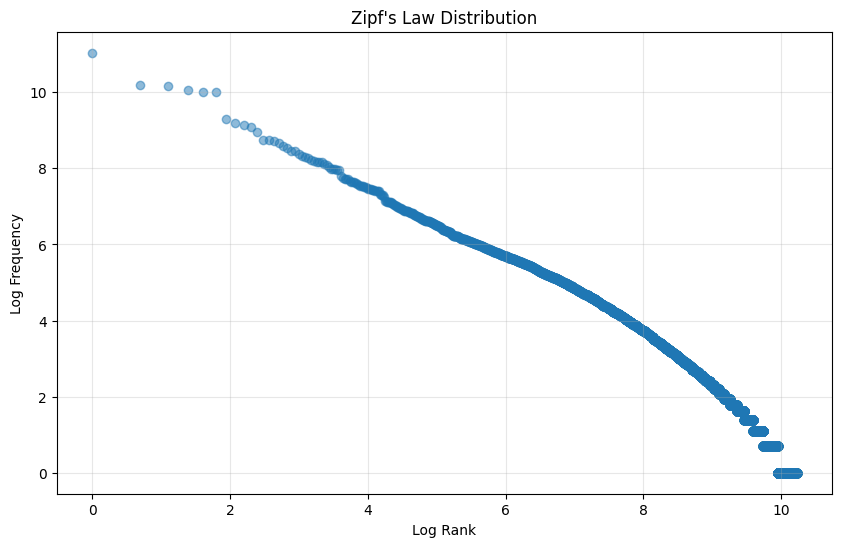

In [25]:
# TODO: Plot a graph of the log of the rank (starting at 1) on the x-axis,
# against the log of the frequency on the y-axis. You may use the matplotlib
# or other library.
import matplotlib.pyplot as plt

def plot_zipf_law(frequency_pairs):
    # Extract frequencies and calculate ranks
    frequencies = [pair[1] for pair in frequency_pairs]
    ranks = list(range(1, len(frequencies) + 1))

    # Calculate log values
    log_frequencies = [log(freq) for freq in frequencies]
    log_ranks = [log(rank) for rank in ranks]

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(log_ranks, log_frequencies, alpha=0.5)

    # Add labels and title
    plt.xlabel('Log Rank')
    plt.ylabel('Log Frequency')
    plt.title("Zipf's Law Distribution")

    # Add grid for better readability
    plt.grid(True, alpha=0.3)

    # Display plot
    plt.show()

# Assuming frequency_pairs is your list of (word, frequency) tuples
plot_zipf_law(frequency)


In [13]:
# TODO: Compute the number of tokens in the corpus.
# Remember to count each occurrence of each word. For instance, the 62,216
# instances of "the" will all count here.
ntokens = sum(frequency[1] for frequency in frequency)
print(ntokens)

1000000


In [14]:
# TODO: Compute the proportion of tokens made up by the top 10 most
# frequent words.
top_10_ratio = sum(freq[1] for freq in frequency[:10]) / ntokens
print(top_10_ratio)

0.221568


In [15]:
# TODO: Compute the proportion of tokens made up by the words that occur
# exactly once in this collection.
single_token_ratio = sum(1 for freq in frequency if freq[1] == 1) / ntokens
print(single_token_ratio)

0.006641


## Acquiring New Documents (for CS6200)

For this assignment so far, you've worked with data that's already been extracted, tokenized, and counted. In this final section, you'll explore acquiring new data.

One common way of acquiring data is through application programming interfaces (APIs) to various databases. The Library of Congress's [_Chronicling America_](https://chroniclingamerica.loc.gov/) site aggregates digitized US newspapers from the past two hundred years, such as the [_Seattle Star_](https://chroniclingamerica.loc.gov/lccn/sn87093407/1925-01-17/ed-1/seq-1/) from 100 years ago.

You can use [the API](https://chroniclingamerica.loc.gov/about/api/) to retrieve JSON data listing all issues of the _Seattle Star_: https://chroniclingamerica.loc.gov/lccn/sn87093407.json

Note the list in the `issues` field. For example, here is the record for the January 17, 1925, issue: https://chroniclingamerica.loc.gov/lccn/sn87093407/1925-01-17/ed-1.json

In that issue record, you'll see records for each page, e.g.: https://chroniclingamerica.loc.gov/lccn/sn87093407/1925-01-17/ed-1/seq-1.json

And inside that page record, you'll see links to data about that page in various data formats, such as JPEG, PDF, and plain text, which is what we want here: https://chroniclingamerica.loc.gov/lccn/sn87093407/1925-01-17/ed-1/seq-1/ocr.txt

This plain text was transcribed from the old page images using optical character recognition (OCR) models, and so contains errors.

Your task is to acquire and analyze the issues of the _Seattle Star_ from the month of January, 1925, i.e., the issues with a date field that starts with `1925-01`. This should be about the same amount of data as the million words from the Associated Press you analyzed in the last section.

**TODO**: Write code that calls the _Chronicling America_ API to download and extract the text from the _Seattle Star_ from January 1925. You can use the `json` library from above and any other libraries you wish to fetch data from URLs. As you would when working with any production API, you may need to limit your rate of requests.

In [16]:
# TODO: Data acquisition code here.
# !wget -o some_resp.json https://chroniclingamerica.loc.gov/lccn/sn87093407.json
# import requests
# import json
# import os

# def fetch_chronicle_data(lccn):
#     """
#     Fetch newspaper data from Chronicling America API
#     Args:
#         lccn (str): Library of Congress Control Number
#     Returns:
#         dict: Parsed JSON response
#     """
#     url = f"https://chroniclingamerica.loc.gov/lccn/{lccn}.json"
#     temp_file = "temp_response.json"

#     try:
#         # Make HTTP request
#         response = requests.get(url)
#         response.raise_for_status()

#         # Save and parse JSON
#         with open(temp_file, 'w') as f:
#             json.dump(response.json(), f)

#         with open(temp_file, 'r') as f:
#             data = json.load(f)

#         # Cleanup temp file
#         os.remove(temp_file)
#         return data

#     except requests.exceptions.RequestException as e:
#         print(f"Error fetching data: {e}")
#         return None
#     except json.JSONDecodeError as e:
#         print(f"Error parsing JSON: {e}")
#         return None
#     finally:
#         if os.path.exists(temp_file):
#           os.remove(temp_file)

# # Usage
# data = fetch_chronicle_data('sn87093407')
# if data:
#     print(data)



In [ ]:
import requests
import json
import os
import time
from datetime import datetime
from typing import Dict

def fetch_issues_for_month(lccn, year=1925, month=1):
    """
    Fetch all newspaper issues for a specific month and year
    """
    base_url = f"https://chroniclingamerica.loc.gov/lccn/{lccn}.json"
    issues_data = []

    try:
        # Fetch main newspaper metadata
        response = requests.get(base_url)
        response.raise_for_status()
        data = response.json()

        # Filter issues for specified month/year
        target_issues = [
            issue for issue in data['issues']
            if datetime.strptime(issue['date_issued'], '%Y-%m-%d').year == year
            and datetime.strptime(issue['date_issued'], '%Y-%m-%d').month == month
        ]

        # Fetch each matching issue
        for issue in target_issues:
            print(f"Fetching issue from {issue['date_issued']}...")
            response = requests.get(issue['url'])
            response.raise_for_status()
            issues_data.append(response.json())
            time.sleep(5)  # Rate limiting

        return issues_data

    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return None

# Usage
january_1925_issues = fetch_issues_for_month('sn87093407', 1925, 1)
if january_1925_issues:
    print(f"Found {len(january_1925_issues)} issues from January 1925")
    for issue in january_1925_issues:
        print(f"Issue date: {issue.get('date_issued', 'unknown')}")

print(january_1925_issues[0])

def fetch_ocr_for_issues(issues_data: list) -> Dict[str, str]:
    """
    Fetches OCR text for all pages of all issues and stores them in a dictionary.
    Returns dict with format: {'YYYYMMDD_ed{edition}_p{page}': 'ocr_text'}
    """
    ocr_texts = {}

    for issue in issues_data:
        date = issue['date_issued'].replace('-', '')
        edition = issue['edition']

        for page in issue['pages']:
            # Convert JSON URL to OCR URL
            ocr_url = page['url'].replace('.json', '/ocr.txt')

            # Create unique key for this page
            key = f"{date}_ed{edition}_p{page['sequence']}"

            try:
                # Fetch OCR text
                response = requests.get(ocr_url)
                response.raise_for_status()
                ocr_texts[key] = response.text

                # Be nice to the server
                time.sleep(5)

            except requests.exceptions.RequestException as e:
                print(f"Error fetching OCR for {key}: {e}")
                ocr_texts[key] = ""

            print(f"Processed {key}")

    return ocr_texts

# Usage
ocr_collection = fetch_ocr_for_issues(january_1925_issues)



In [18]:
print(len(ocr_collection.keys()))

492


In [26]:
# Zip the ocr text and store
import gzip
from pathlib import Path
from typing import Optional

def save_ocr_collection(ocr_data: Dict[str, str], compress: bool = True) -> bool:
    """Save OCR collection with optional compression"""
    try:
        data_dir = Path("data").resolve()
        data_dir.mkdir(exist_ok=True)

        # Save both formats for comparison first time
        json_path = data_dir / "ocr_collection.json"
        zip_path = data_dir / "ocr_collection.json.gz"

        # Save uncompressed for comparison
        with open(json_path, 'w', encoding='utf-8') as f:
            json.dump(ocr_data, f, ensure_ascii=False)
        json_size = os.path.getsize(json_path)

        # Save compressed
        with gzip.open(zip_path, 'wt', encoding='utf-8') as f:
            json.dump(ocr_data, f, ensure_ascii=False)
        zip_size = os.path.getsize(zip_path)

        # Show size comparison
        print(f"JSON size: {json_size/1024/1024:.2f}MB")
        print(f"ZIP size: {zip_size/1024/1024:.2f}MB")

        # Remove uncompressed if compression requested
        if compress:
            json_path.unlink()
            print(f"Kept compressed file at: {zip_path}")

        return True

    except Exception as e:
        print(f"Error saving: {e}")
        return False

def load_ocr_collection() -> Optional[Dict[str, str]]:
    """Load OCR collection (handles both compressed and uncompressed)"""
    try:
        data_dir = Path("data").resolve()
        zip_path = data_dir / "ocr_collection.json.gz"
        json_path = data_dir / "ocr_collection.json"

        if zip_path.exists():
            with gzip.open(zip_path, 'rt', encoding='utf-8') as f:
                return json.load(f)
        elif json_path.exists():
            with open(json_path, 'r', encoding='utf-8') as f:
                return json.load(f)
        else:
            print("No saved collection found")
            return None

    except Exception as e:
        print(f"Error loading: {e}")
        return None

# Usage:
save_ocr_collection(ocr_collection, compress=True)  # Save compressed
loaded_data = load_ocr_collection()  # Auto-detects format

JSON size: 10.25MB
ZIP size: 5.01MB
Kept compressed file at: /content/data/ocr_collection.json.gz


In [28]:
print(len(loaded_data.keys()))

492


**TODO**: Write code to tokenize the text and count the resulting terms in each document. Since this data comes from automatically transcribing printed pages, some words may be hyphenated across line breaks. There is more than one right way to tokenize this data, so add comments to your code documenting your choices.

In [ ]:
# TODO: Tokenization code here.

**TODO**: Plot a graph of the log rank against log frequency for your collection, as you did for the sample collection above.

In [ ]:
# TODO: Plotting code here.

**TODO**: What do you observe about the differences between the distributions of the Associated Press and Seattle Star collections? In this text box, give some possible reasons for these differences.